<font size="7"><span style="color: #33D6CC;">MODELO EXTRA XGBOOST</span></font>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import sklearn.metrics

In [5]:
df = pd.read_csv('features_final.csv')
df

,draw_size,J1_ht,J1_age,J2_ht,J2_age,best_of,minutes,J1_rank,J1_rank_points,J2_rank,...,tourney_level_M,J1_hand_L,J1_hand_R,J1_hand_U,J2_hand_L,J2_hand_R,J2_hand_U,estacion_otoño,estacion_primavera,estacion_verano
0,32.0,180.000000,25.0,175.000000,20.0,3,63.0,0.111111,1487.0,0.012821,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,32.0,180.000000,21.0,188.000000,31.0,3,72.0,0.010638,371.0,0.004545,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,32.0,185.000000,25.0,185.000000,21.0,3,101.0,0.012987,468.0,0.004717,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,32.0,180.000000,25.0,173.000000,23.0,3,108.0,0.015385,502.0,0.013889,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,32.0,185.000000,19.0,196.000000,20.0,3,65.0,0.005263,142.0,0.035714,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89200,4.0,175.000000,34.0,185.267928,18.0,3,81.0,0.007353,489.0,0.000902,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
89201,4.0,175.000000,34.0,185.000000,23.0,3,95.0,0.007353,489.0,0.001623,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89202,4.0,185.832809,18.0,185.267928,21.0,3,77.0,0.000902,8.0,0.001351,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
89203,4.0,185.832809,26.0,185.267928,23.0,3,131.0,0.001805,67.0,0.001337,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
X =df.drop(columns='minutes')
y =df['minutes']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
model= XGBRegressor()
params={'max_depth': [3,4], # profundidad, cuanta más, mas sobreajuste
        'learning_rate': [0.09,0.1], #mas alto, más sobreajuste
        'n_estimators': [500,550,600],
        'subsample': [0.6,0.8], #mas alto, más sobreajuste
        'colsample_bylevel':[0.6,0.4],# se muestrean en cada nivel del árbol de decisión. Esto introduce un nivel adicional de alea
        'colsample_bytree': [0.3,0.5],#Proporción de características (columnas) utilizadas para entrenar cada árbol.más alto más sobreajuste
        'min_child_weight': [15,20], ##peso mínimo total (o el número mínimo de muestras) que un nodo hijo debe tener para ser considerado para una división (split). más bajo, mas sobreajuste
              }
       

n_cv=5
# scoring: lista de metricas a obtener
scoring = ['neg_mean_squared_error', 'r2']

# creamos la GridSeacrh
grid_solver = GridSearchCV(estimator = model, # model to train
                           param_grid = params, # param_grid
                           scoring = scoring,
                           cv = n_cv,
                           refit = 'r2',
                           verbose = 2) # cuanto va a imprimir por pantalla

# entrenamos
model_result = grid_solver.fit(X_train,y_train)

model_result.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END colsample_bylevel=0.6, colsample_bytree=0.3, learning_rate=0.09, max_depth=3, min_child_weight=15, n_estimators=500, subsample=0.6; total time=   2.2s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.3, learning_rate=0.09, max_depth=3, min_child_weight=15, n_estimators=500, subsample=0.6; total time=   2.4s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.3, learning_rate=0.09, max_depth=3, min_child_weight=15, n_estimators=500, subsample=0.6; total time=   2.4s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.3, learning_rate=0.09, max_depth=3, min_child_weight=15, n_estimators=500, subsample=0.6; total time=   2.4s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.3, learning_rate=0.09, max_depth=3, min_child_weight=15, n_estimators=500, subsample=0.6; total time=   2.3s
[CV] END colsample_bylevel=0.6, colsample_bytree=0.3, learning_rate=0.09, max_depth=3, min_child_weight=15, n_estimators=500, subsample=0

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.6, colsample_bynode=None, colsample_bytree=0.5,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=20, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [12]:
y_hat = model_result.predict(X_train)
y_pred = model_result.predict(X_test)

In [13]:
print("Train score:",model_result.score(X_train, y_train))
print("Test score:",model_result.score(X_test, y_test))
print('Mejores parámetros:',model_result.best_params_)

Train score: 0.6530454814456808
Test score: 0.5811254016079515
Mejores parámetros: {'colsample_bylevel': 0.6, 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 20, 'n_estimators': 600, 'subsample': 0.8}


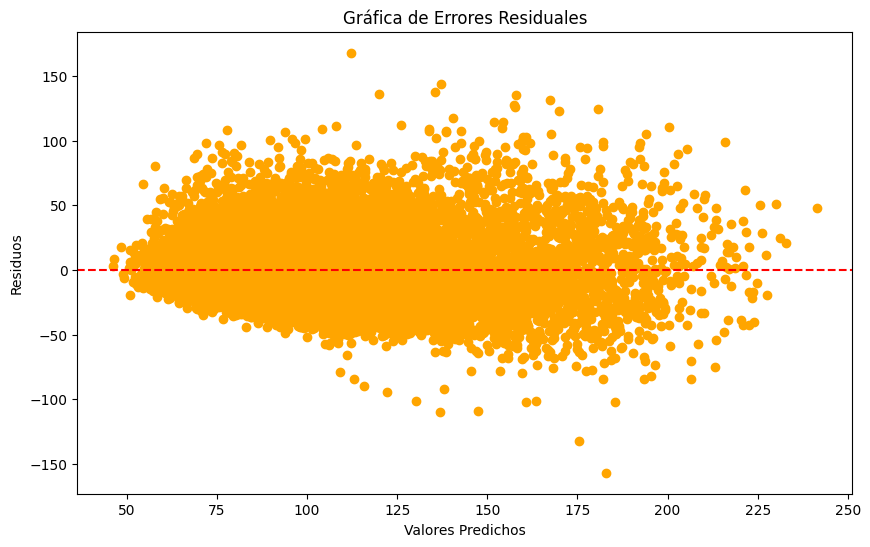

In [14]:
# Gráfica de Errores Residuales
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals,color = 'orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfica de Errores Residuales')
plt.show()

In [15]:
X_test['error']=model_result.predict(X_test)-y_test

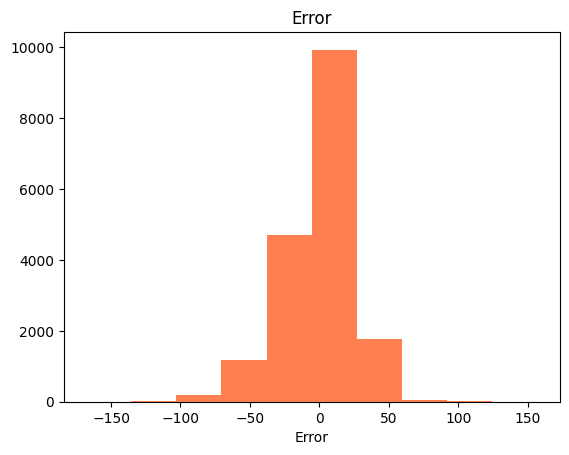

In [16]:
plt.hist(X_test.error,color='coral')
plt.xlabel('Error')
plt.title('Error')
plt.show()

C:\Users\albam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


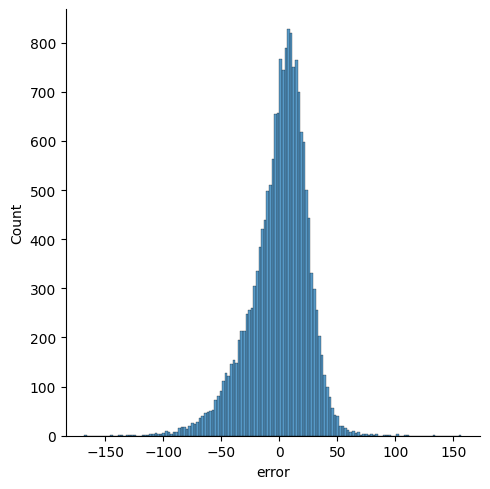

In [17]:
sns.displot(X_test['error'])

In [18]:
X_test.shape

(17841, 71)

In [19]:
error = X_test.query('-50 > error or 50 < error ')
error.shape

(861, 71)

In [20]:
errores = pd.merge(error,y_test,left_index = True,right_index=True)

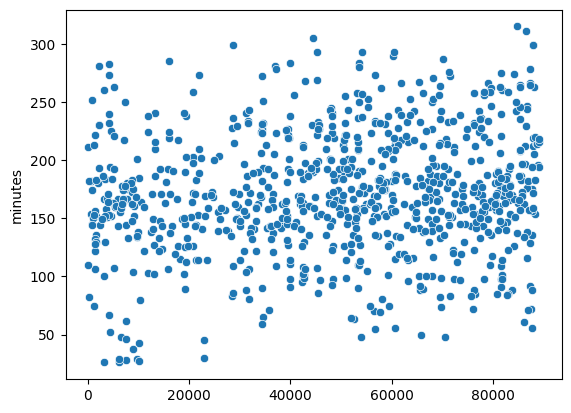

In [21]:
sns.scatterplot(errores['minutes'])#de 150 a 200 es lo que peor 
plt.show()

C:\Users\albam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


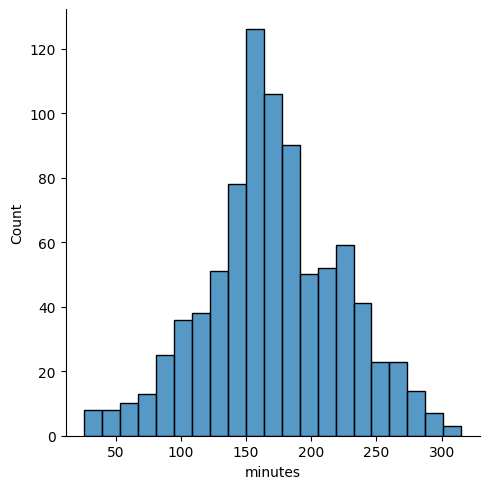

In [22]:
sns.displot(errores['minutes'])

C:\Users\albam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\albam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\albam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\albam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

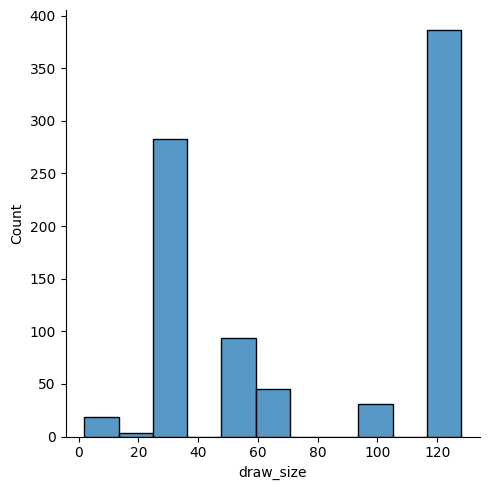

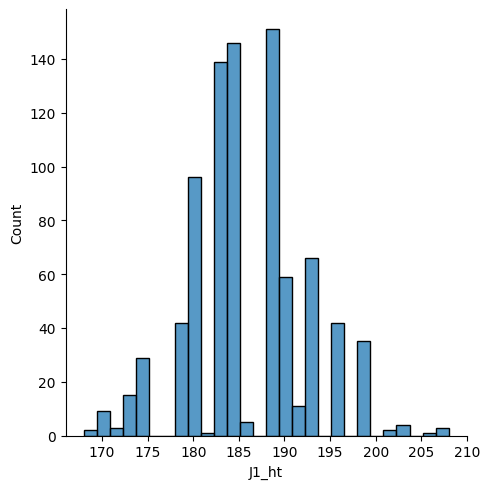

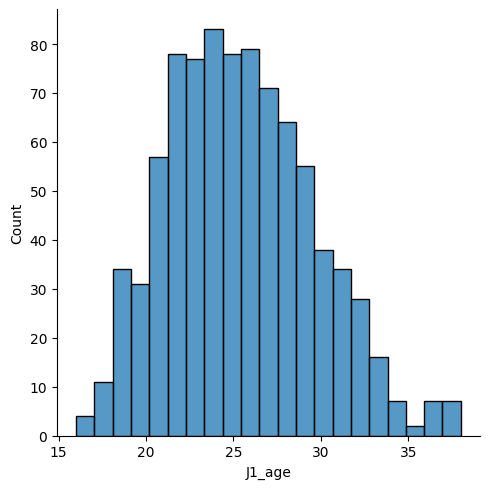

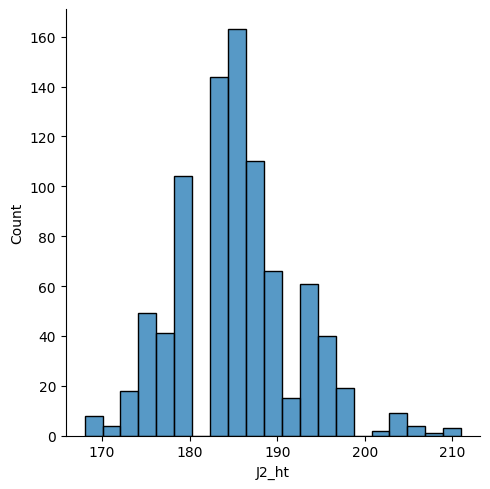

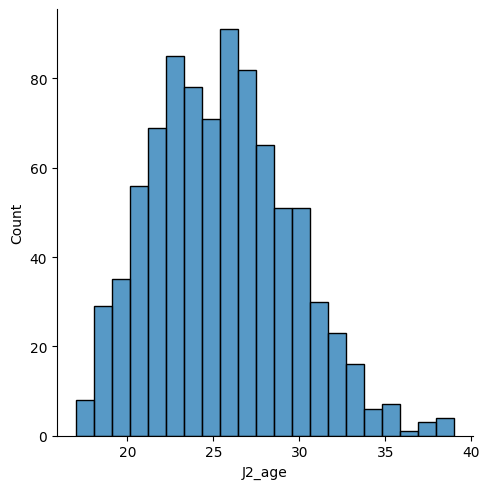

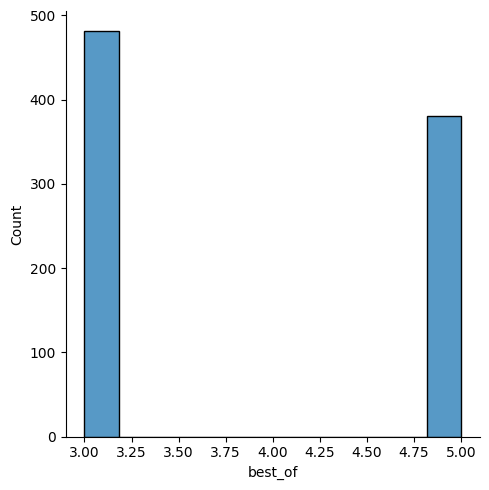

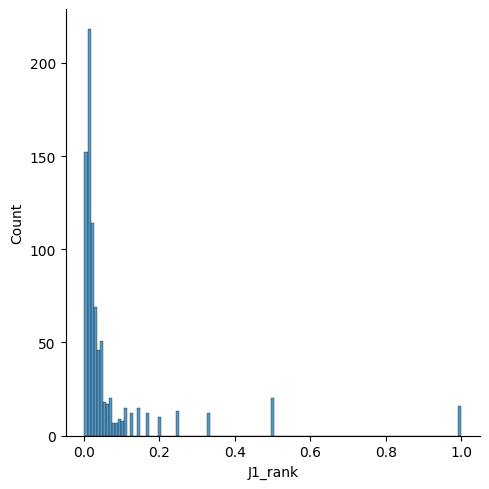

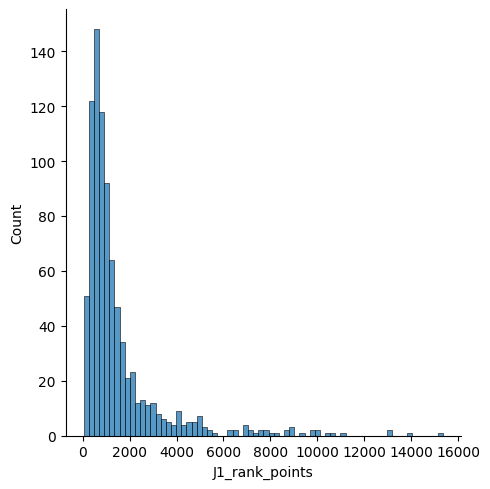

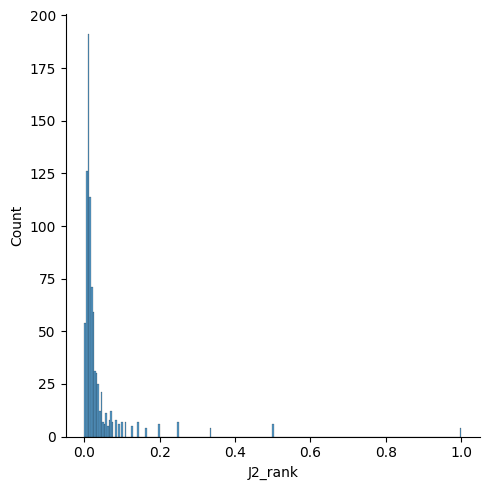

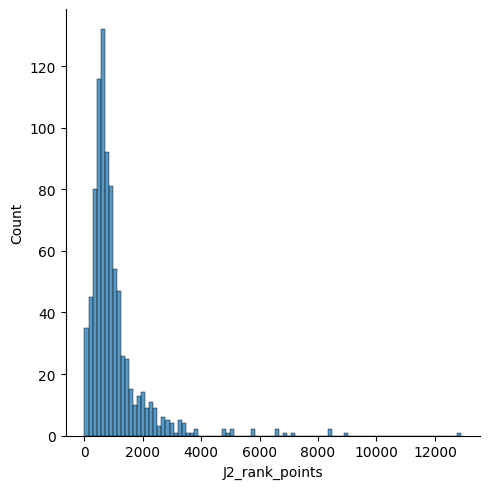

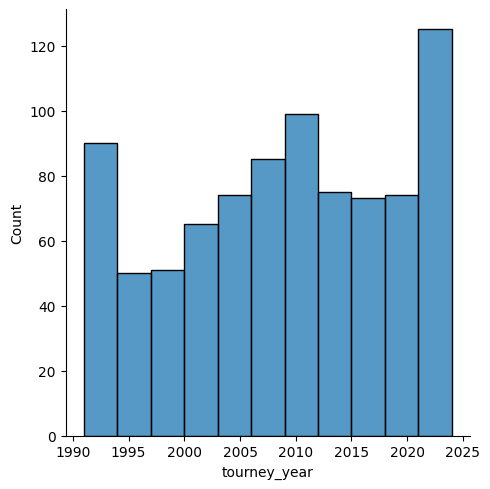

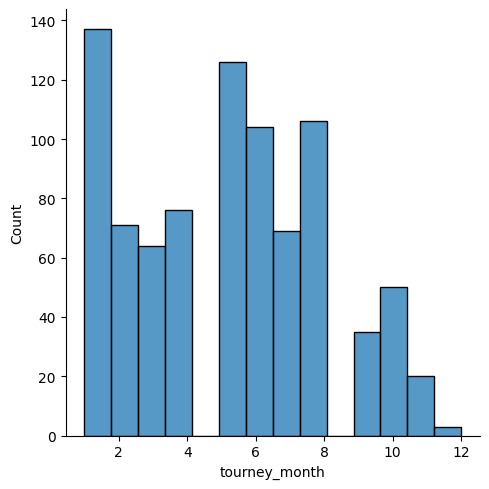

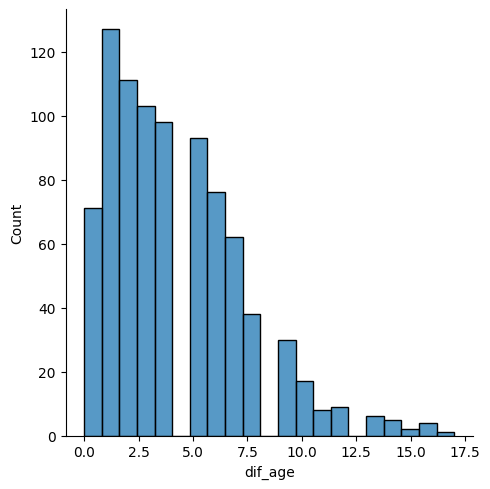

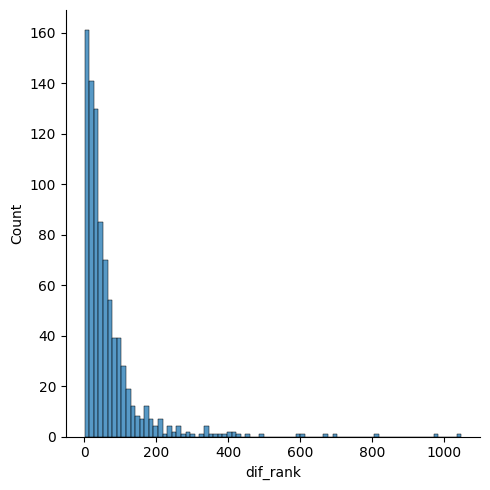

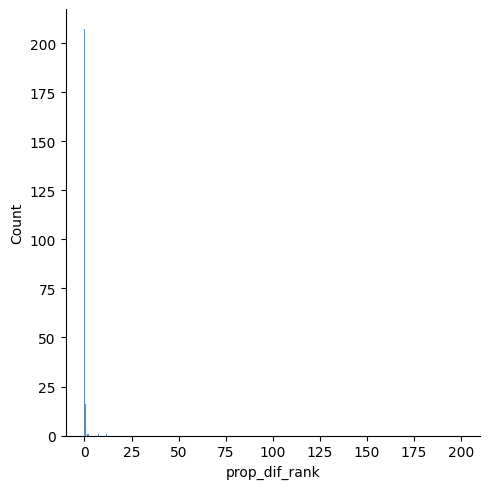

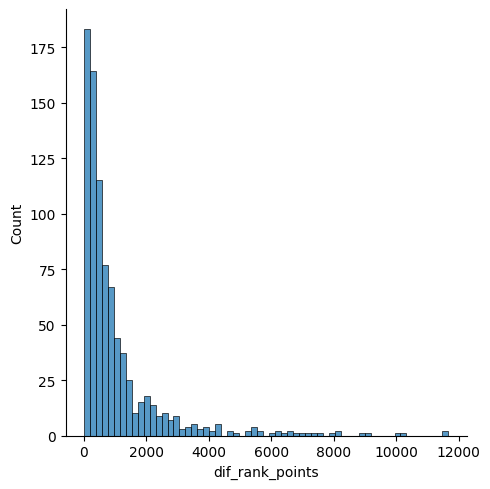

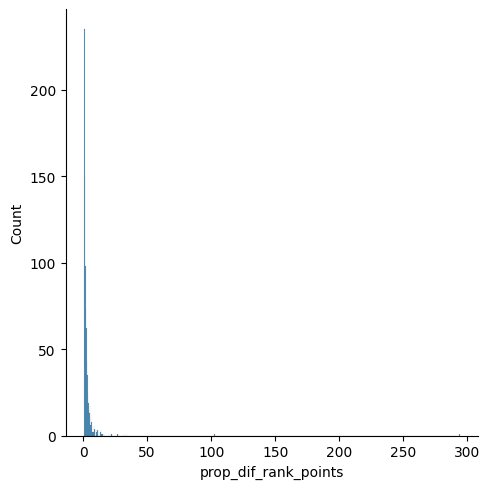

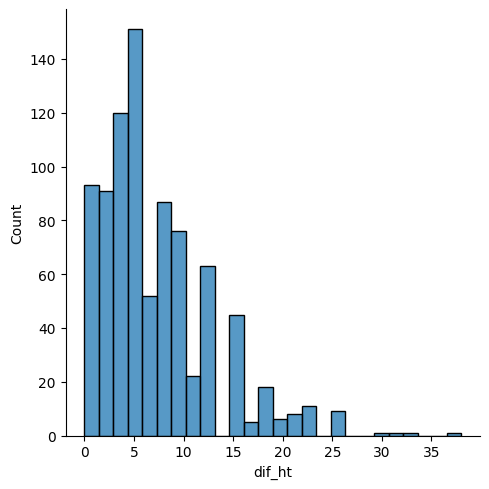

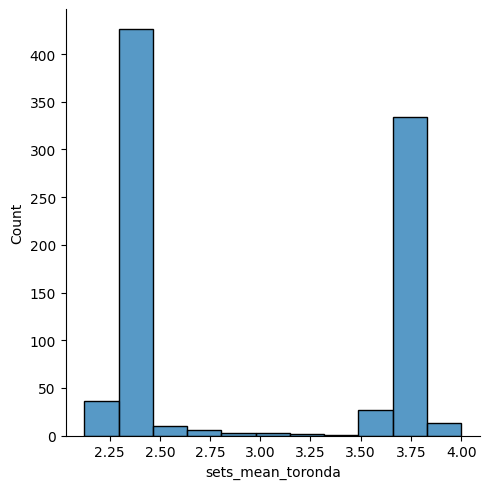

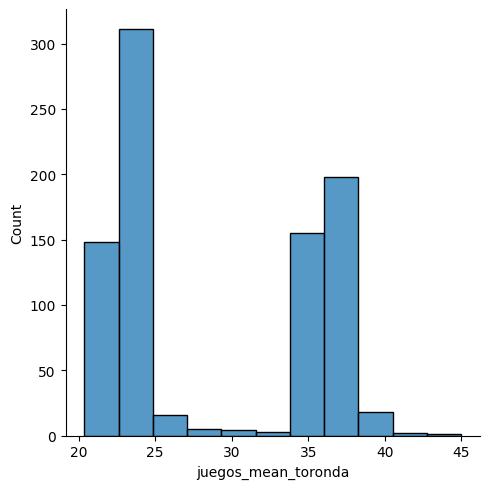

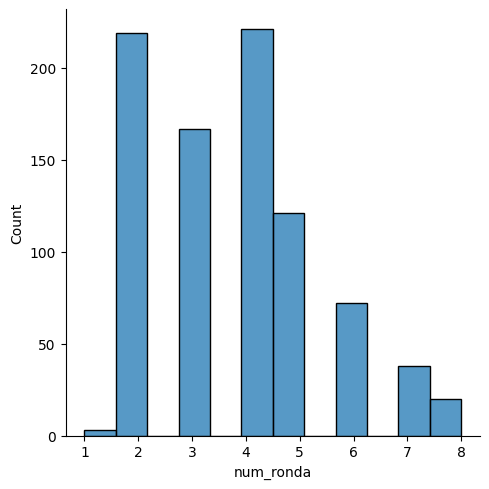

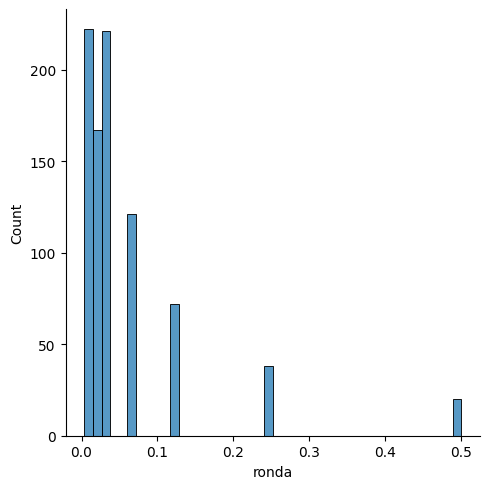

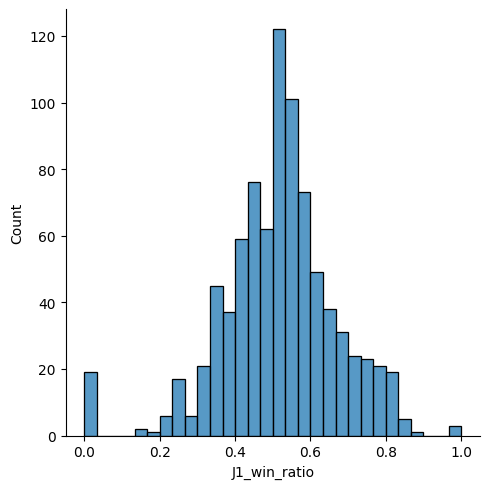

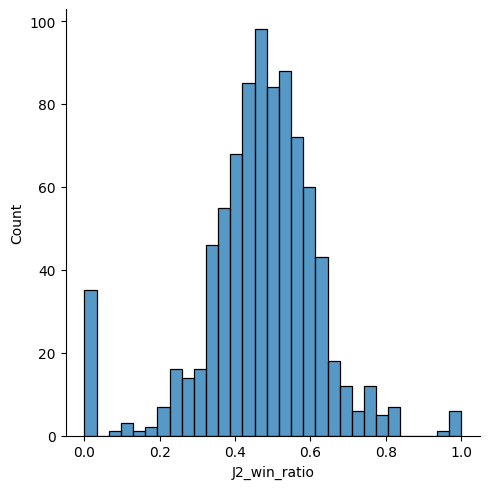

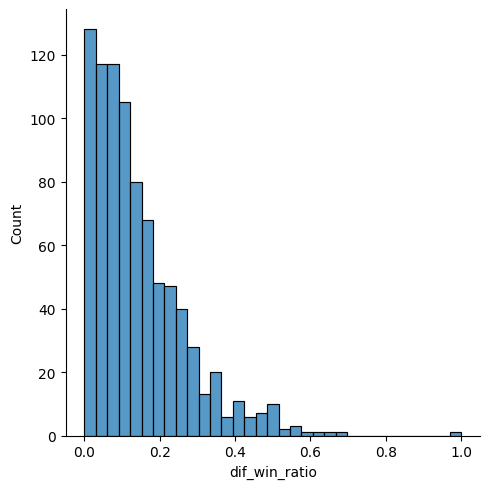

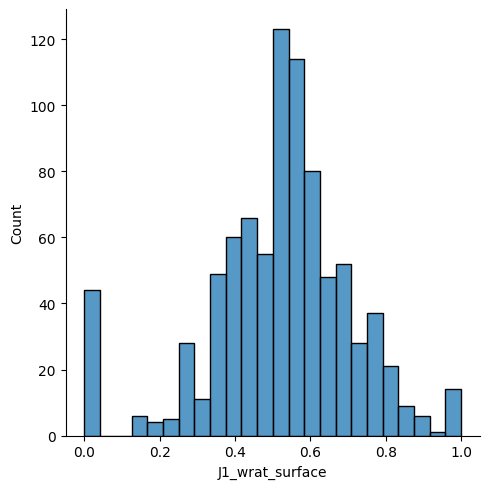

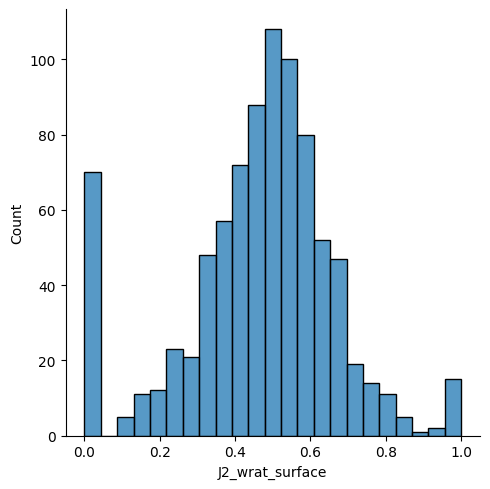

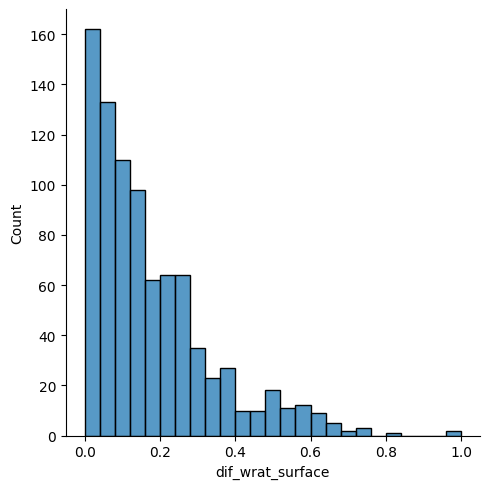

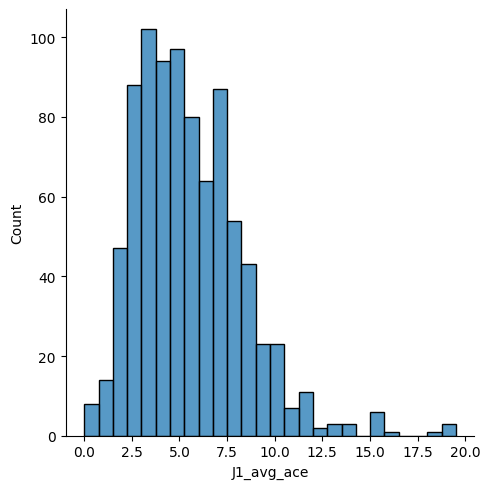

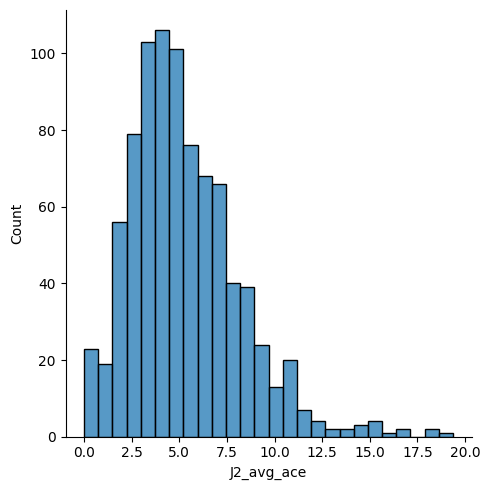

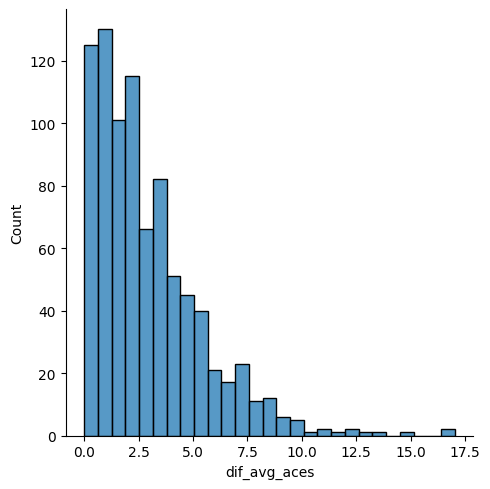

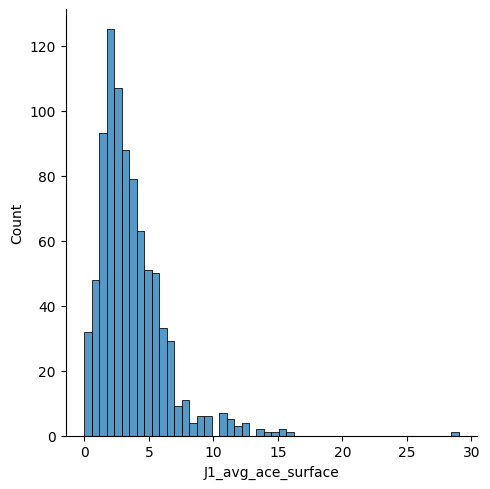

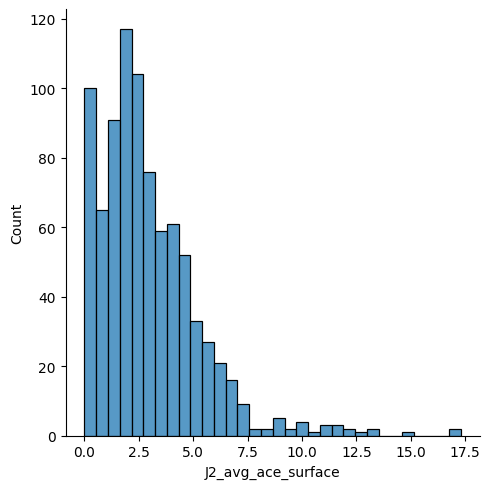

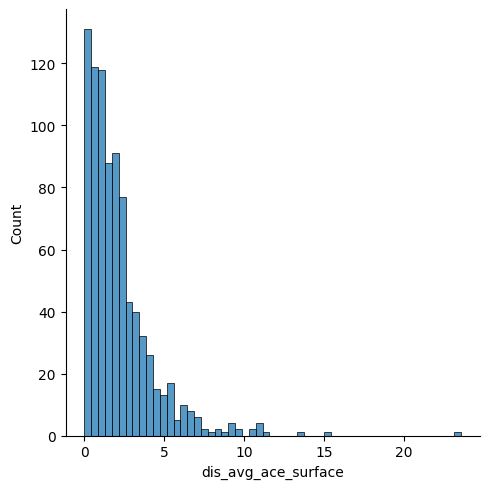

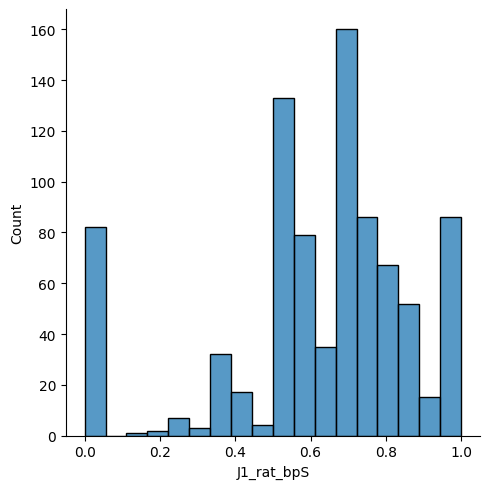

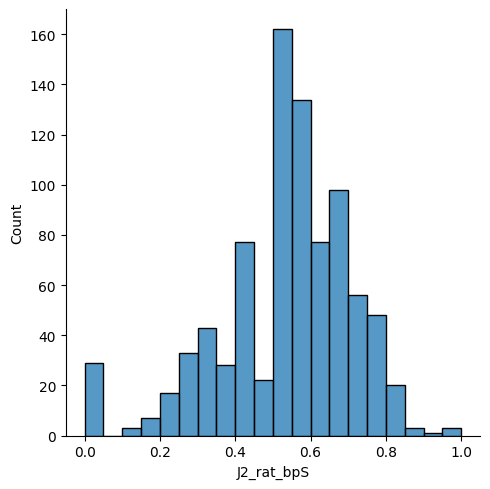

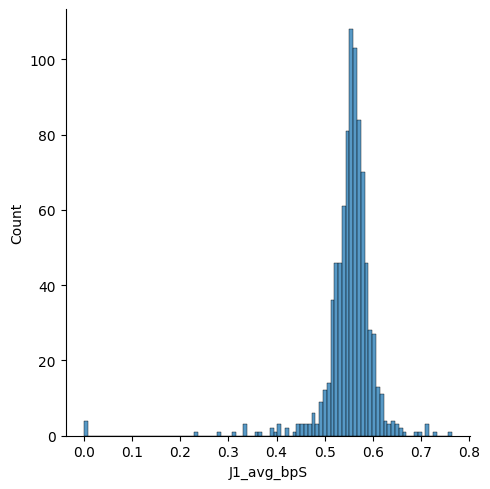

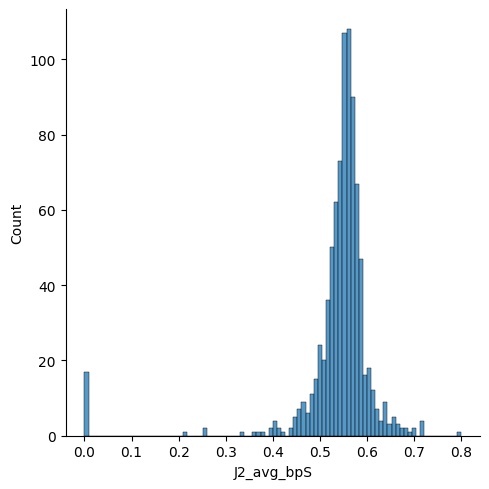

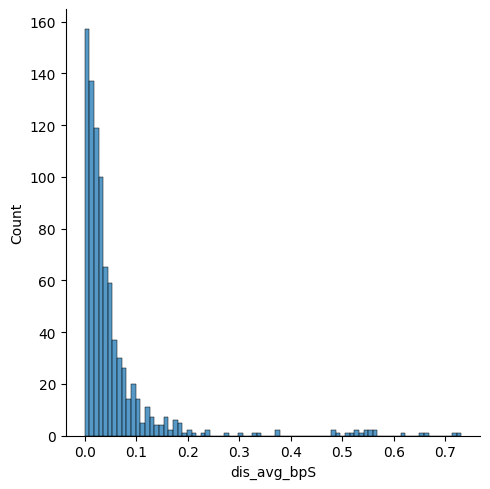

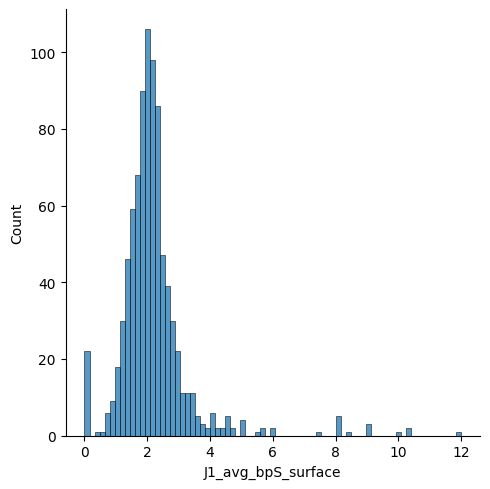

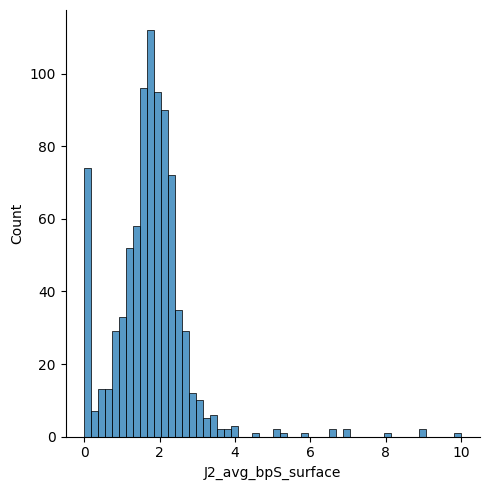

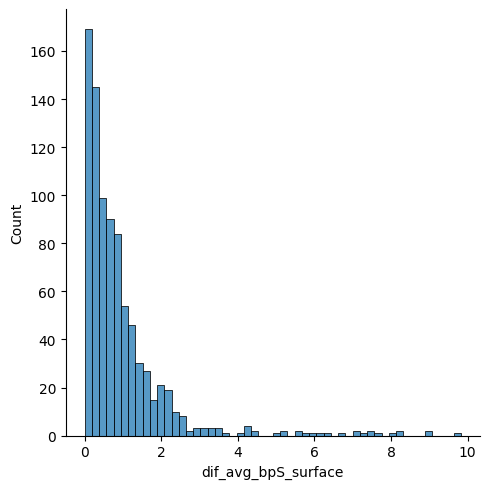

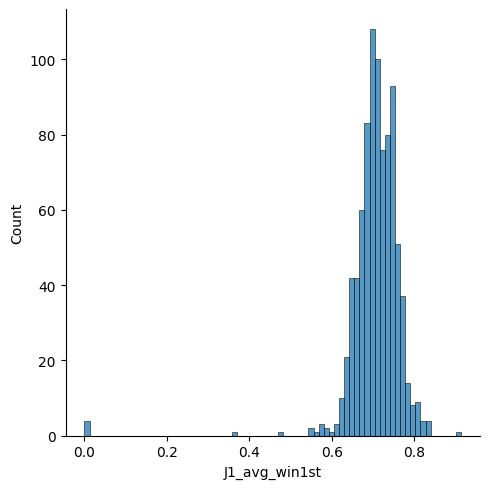

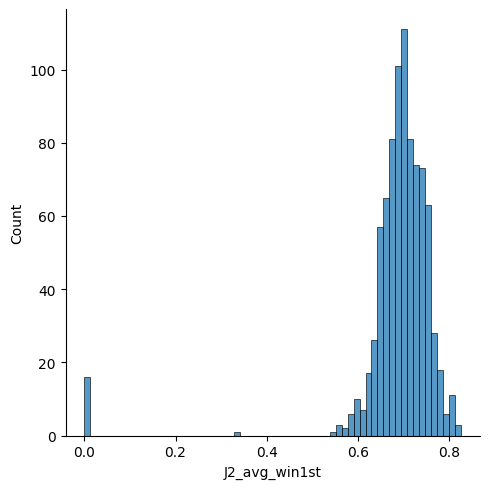

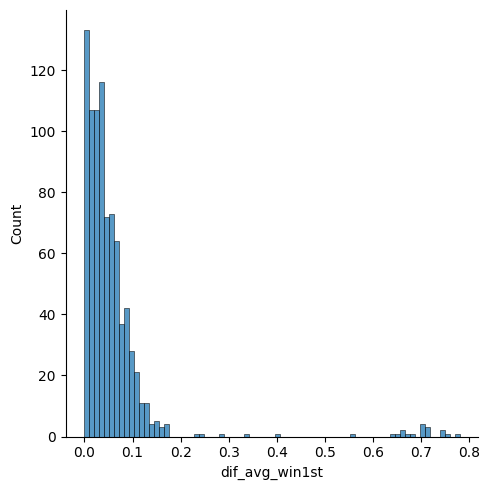

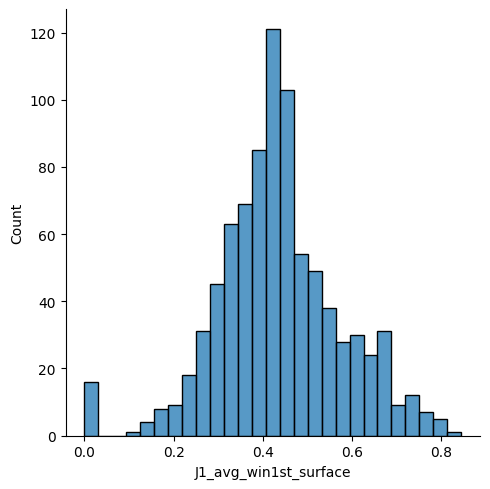

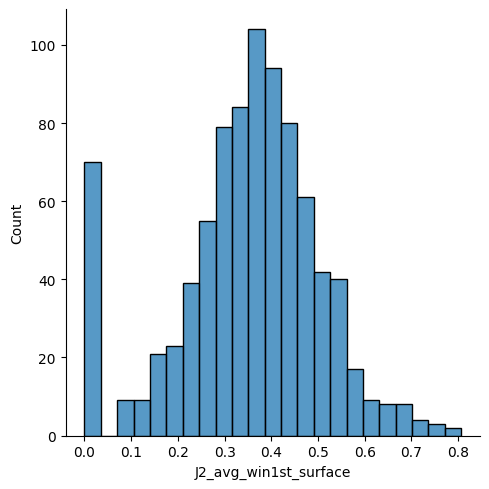

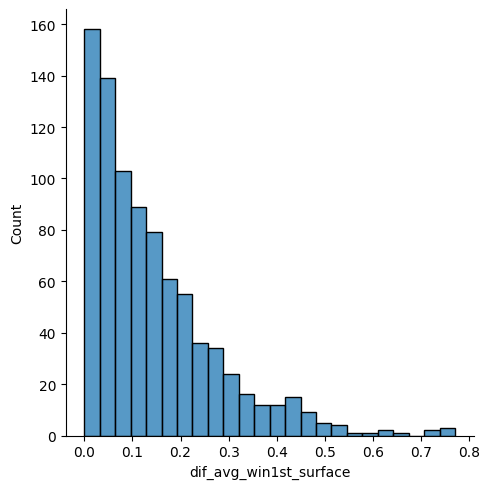

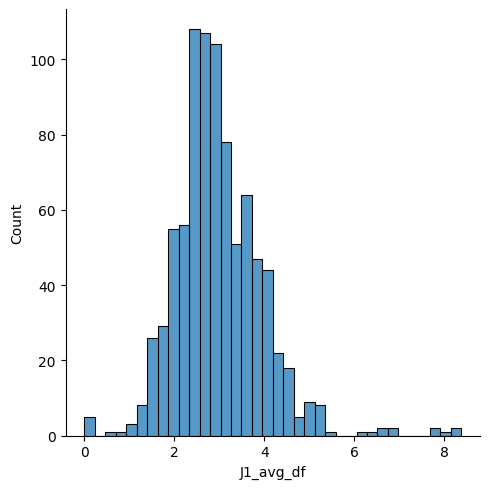

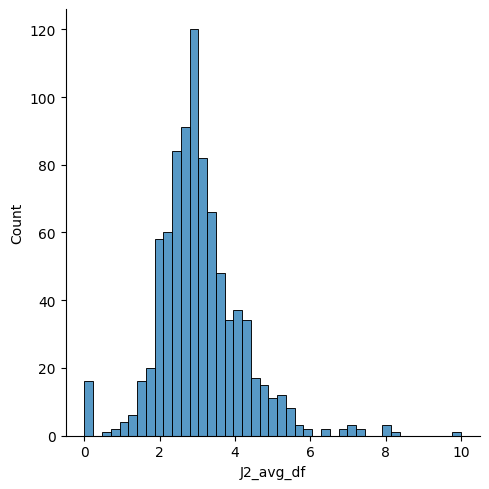

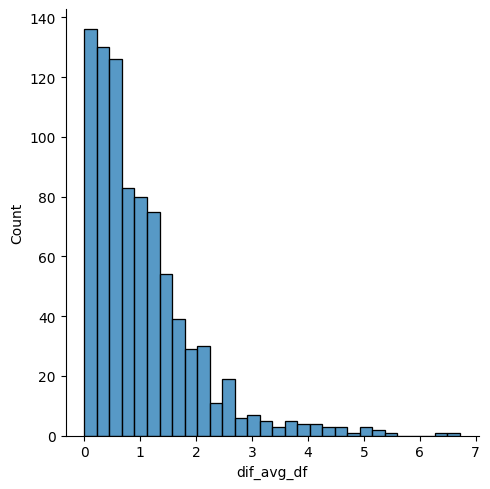

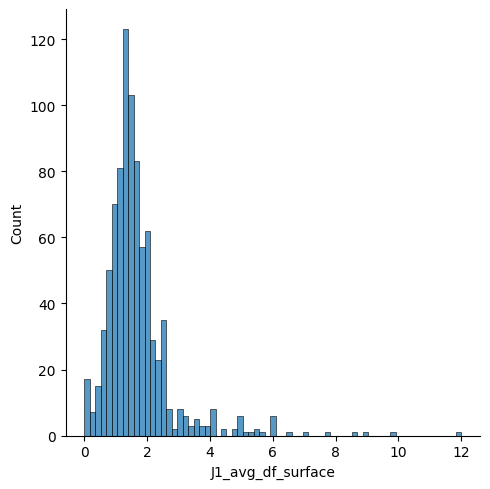

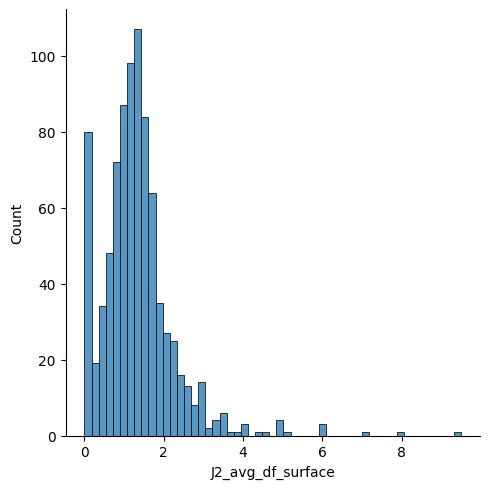

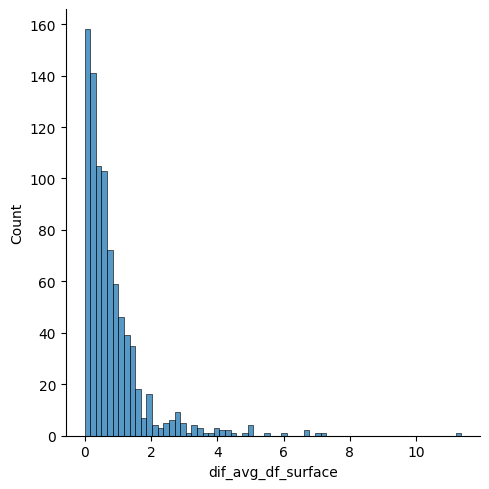

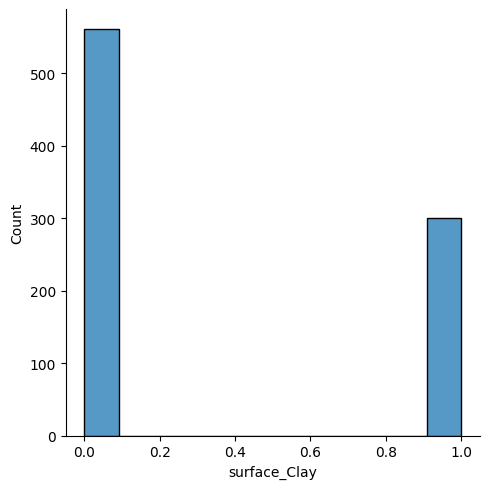

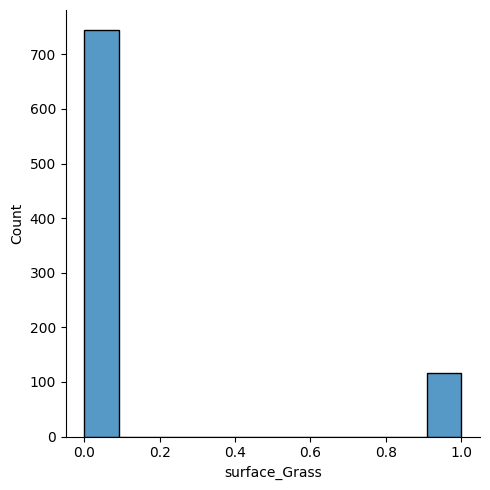

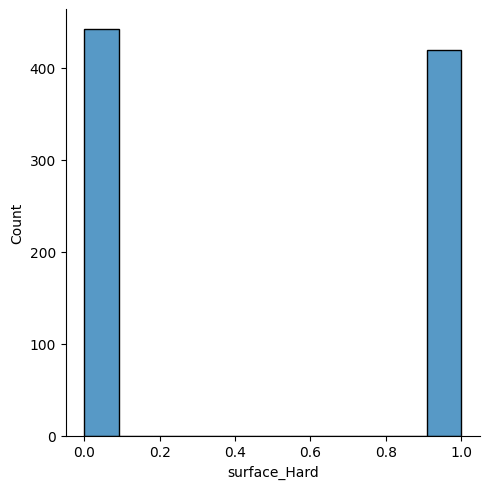

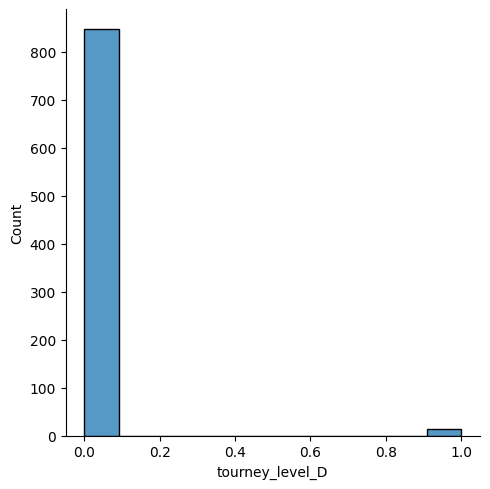

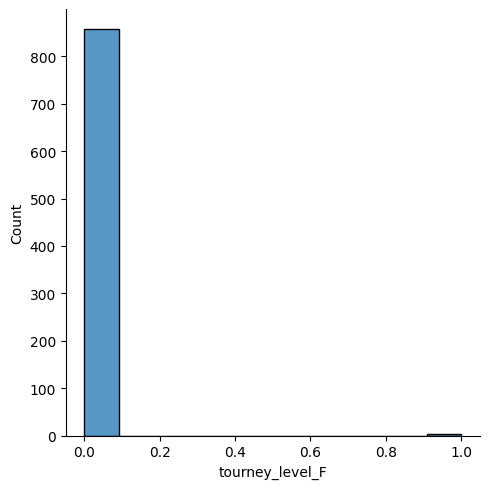

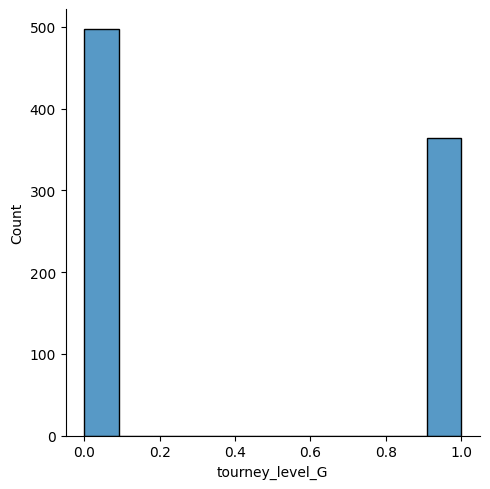

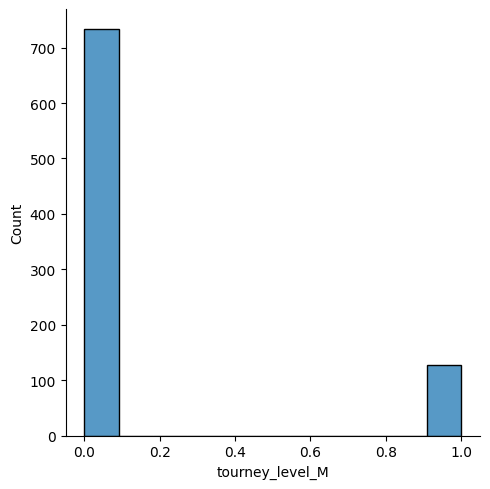

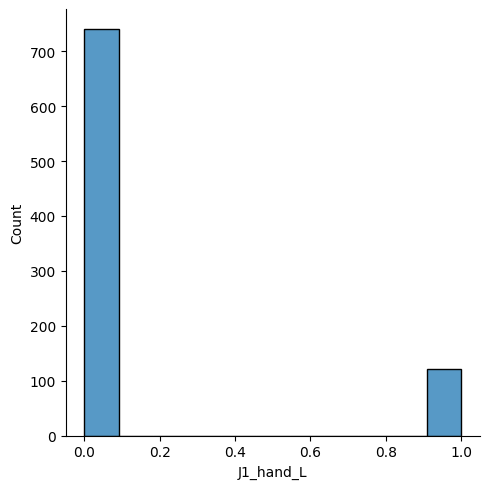

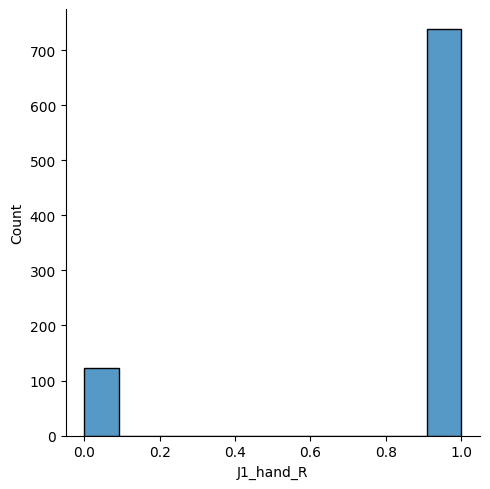

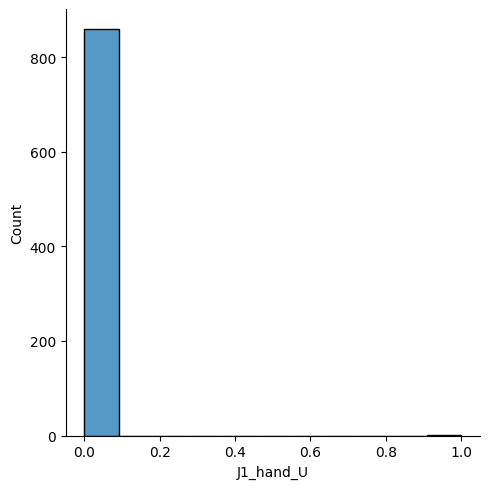

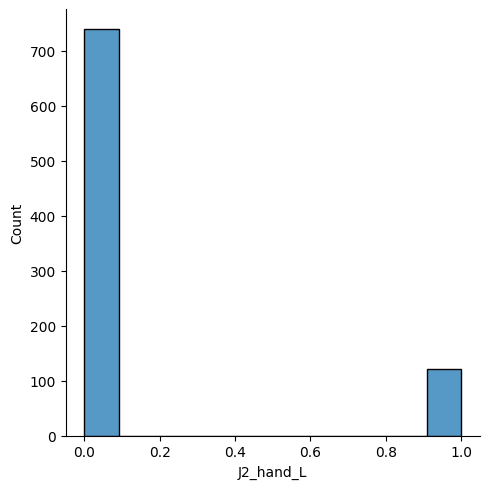

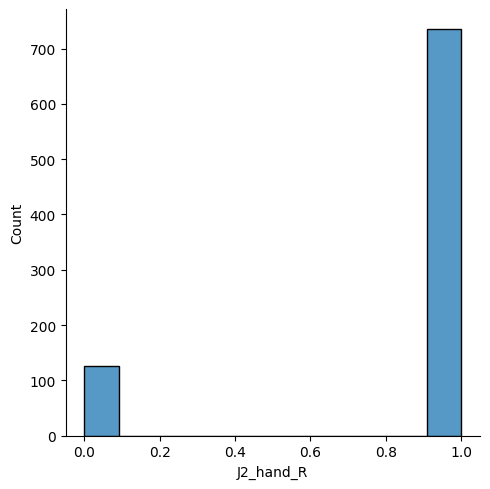

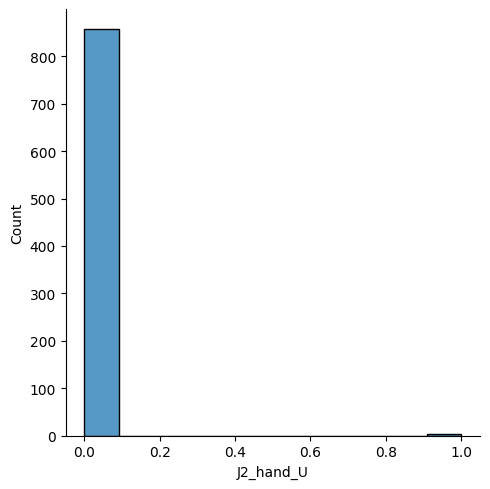

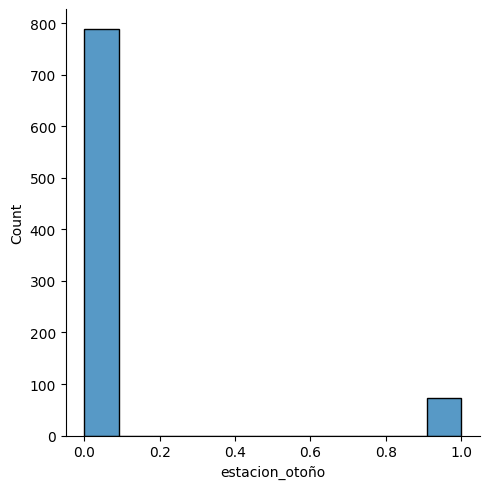

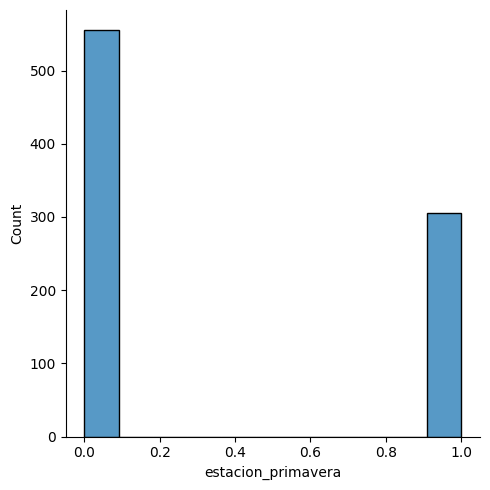

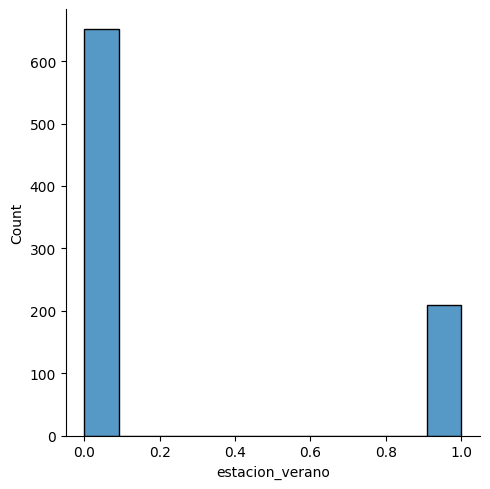

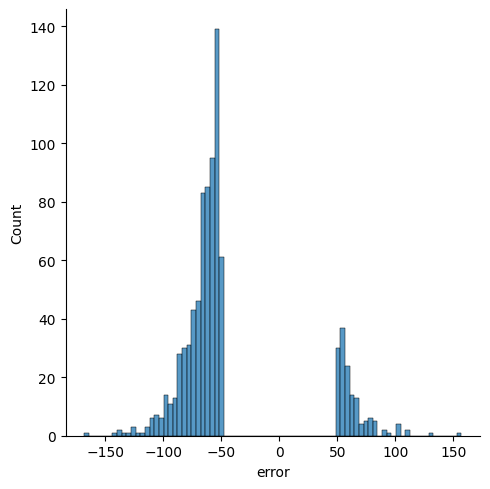

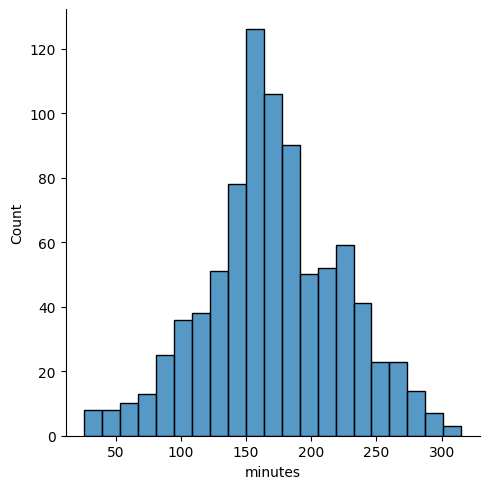

In [23]:
for i in errores:
    sns.displot(errores[i])